# Telcom Customer Churn From IBM Business Analytics Community

In this project, we will analyze Telco customer churn data, which contains information about a fictional telecom company that provided home phone and Internet services to 7,043 customers in California during Q3. Each row represents a customer, and each column contains customer attributes described in the column metadata.

The dataset can be found on Kaggle at the following link: [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv).

We will address the following questions in this analysis:

1. What is the average monthly cost based on their payment method?
2. How is customer tenure distributed into three groups:
   - Low: Customers with tenure < 21 months
   - Medium: Customers with tenure between 21 and 40 months
   - High: Customers with tenure > 40 months
3. Are there a significant number of senior citizens using telephone services?
4. What is the distribution of the total cost?
5. Do customers with higher monthly costs tend to churn more frequently?
6. How does the presence of a partner and dependents impact customer churn rates?
7. Which payment method exhibits the highest churn rate among customers?

Additionally, the dataset includes the following columns:

- customerID: Customer ID
- gender: Gender of the customer (Male or Female)
- SeniorCitizen: Whether the customer is a senior citizen (1 for yes, 0 for no)
- Partner: Whether the customer has a partner (Yes or No)
- Dependents: Whether the customer has dependents (Yes or No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service (Yes or No)
- MultipleLines: Whether the customer has multiple lines (Yes, No, or No phone service)
- InternetService: Customer's internet service provider (DSL, Fiber optic, or No internet service)
- OnlineSecurity: Whether the customer has online security (Yes, No, or No internet service)
- OnlineBackup: Whether the customer has online backup (Yes, No, or No internet service)
- DeviceProtection: Whether the customer has device protection (Yes, No, or No internet service)
- TechSupport: Whether the customer has tech support (Yes, No, or No internet service)
- StreamingTV: Whether the customer has streaming TV (Yes, No, or No internet service)
- StreamingMovies: Whether the customer has streaming movies (Yes, No, or No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two years)
- PaperlessBilling: Whether the customer has paperless billing (Yes or No)
- PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned (Yes or No)

## Data Loading and Exploration

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.style as style

In [2]:
# read the data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

## 1. Segmentation by Payment Method
"What is the average monthly cost based on their payment method?" follow these steps:

* Group the data by the 'PaymentMethod' column.
* Calculate the average monthly cost ('MonthlyCharges') for each payment method group.

In [3]:
# Groupby payment method terhadap monthly charge
df_month = df.groupby(['PaymentMethod'])['MonthlyCharges'].mean().reset_index()
df_month.columns = ['Payment_Method', 'Avg_Monthly_Charges']
df_month['Avg_Monthly_Charges'] = round(df_month['Avg_Monthly_Charges'], 2)
df_month.head()

,Payment_Method,Avg_Monthly_Charges
0,Bank transfer (automatic),67.19
1,Credit card (automatic),66.51
2,Electronic check,76.26
3,Mailed check,43.92


/var/folders/v0/tlwb_9p96z79tgcy17l0j5br0000gn/T/ipykernel_9719/4263850673.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-darkgrid')


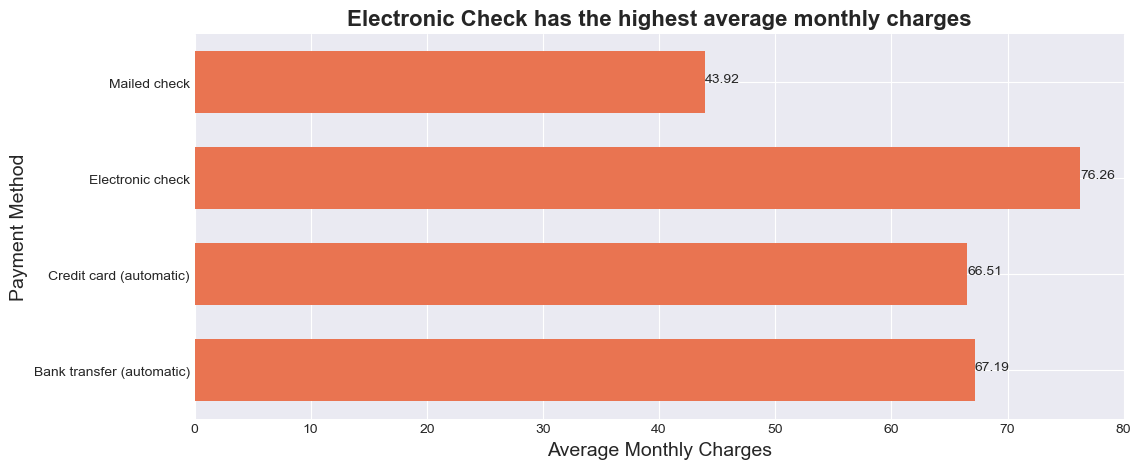

In [15]:
# Matplotlib Graph
plt.figure(figsize=(12,5))
style.use('seaborn-darkgrid')
y = df_month['Avg_Monthly_Charges']
plt.barh(y= 'Payment_Method', width = 'Avg_Monthly_Charges', data=df_month, color='#e97451', height=0.65)
plt.title('Electronic Check has the highest average monthly charges', weight='bold', fontsize=16)
plt.xlabel('Average Monthly Charges', fontsize=14)
plt.ylabel('Payment Method', fontsize=14)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

plt.show()

From the plot above, it can be concluded that:
* The payment method with the highest monthly charge per customer is Electronic Check, amounting to $76.26.

* The lowest is using mailed check, with a monthly charge of $43.92.

## 2. Customer Tenure Segmentation
"How is the customer tenure distributed into three groups?" (Low, Medium, High):

* Create three tenure groups:
    * Low: Customers with tenure < 21 months.
    * Medium: Customers with tenure between 21 and 40 months.
    * High: Customers with tenure > 40 months.

* Assign each customer to the appropriate group based on their 'tenure' value.

In [16]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,20,40, max(df['tenure'])],
                            labels=['low_tenure', 'medium_tenure', 'high_tenure'],
                            include_lowest=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [17]:
df_grouped = df.groupby(['tenure_group'])['customerID'].nunique().reset_index()
df_grouped.columns = ['tenure_group', 'total_customer']
df_grouped

,tenure_group,total_customer
0,low_tenure,2878
1,medium_tenure,1408
2,high_tenure,2757


/var/folders/v0/tlwb_9p96z79tgcy17l0j5br0000gn/T/ipykernel_9719/2185315600.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


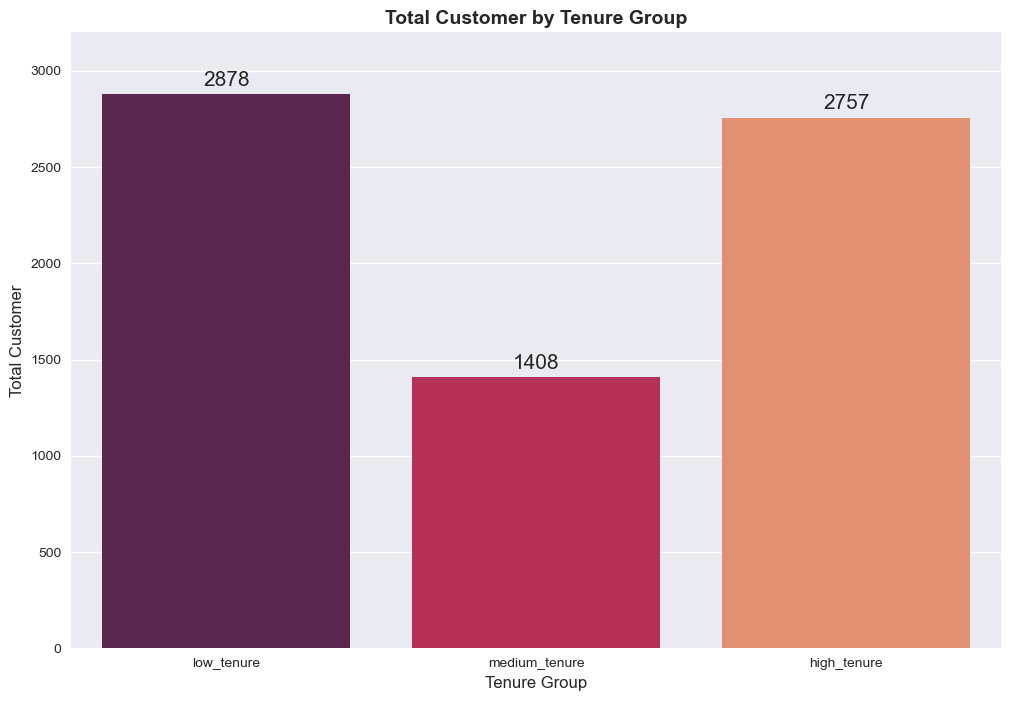

In [36]:
# Seaborn

plt.figure(figsize=(12,8))
style.use('seaborn')
plot = sns.barplot(x='tenure_group', y='total_customer', palette ='rocket', data=df_grouped)
plt.title('Total Customer by Tenure Group', weight='bold', fontsize=14)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Total Customer', fontsize=12)
plt.ylim(0, 3200);
# Annotating Barplot
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 10),  # Adjust the vertical position
                   textcoords = 'offset points')

    
plt.show()

So, from the plot above, it can be concluded that the highest number of customers is in the low tenure group, with a total of 2,878 customers, and the lowest number of customers is in the medium tenure group, with 1,408 customers.

## 3. Senior Citizen Analysis

"Are there many senior citizens using telephone services?":

* Count the number of senior citizens and non-senior citizens who use 'PhoneService.'
* Calculate the proportion of senior citizens using 'PhoneService.'

In [29]:
# Group the data based on whether the customer is a senior citizen and uses telephone services.
senior_phone_group = df.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index()
senior_phone_group = senior_phone_group.rename(columns = {'customerID' : 'UniqueCustomer'})
senior_phone_group

,SeniorCitizen,PhoneService,UniqueCustomer
0,0,No,578
1,0,Yes,5323
2,1,No,104
3,1,Yes,1038


In [30]:
senior_citizen = df.groupby(['SeniorCitizen'])['customerID'].nunique().reset_index()
senior_citizen = senior_citizen.rename(columns = {'customerID' : 'AllUniqueCustomer'})
senior_citizen

,SeniorCitizen,AllUniqueCustomer
0,0,5901
1,1,1142


In [31]:
senior_merge_data = senior_phone_group.merge(senior_citizen)
senior_merge_data

,SeniorCitizen,PhoneService,UniqueCustomer,AllUniqueCustomer
0,0,No,578,5901
1,0,Yes,5323,5901
2,1,No,104,1142
3,1,Yes,1038,1142


In [32]:
senior_merge_data['PercentUniqueCustomer'] = (senior_merge_data['UniqueCustomer']/senior_merge_data['AllUniqueCustomer']) * 100
senior_merge_data.loc[:, 'PercentUniqueCustomer'] = senior_merge_data['PercentUniqueCustomer'].map('{:.2f}'.format)
senior_merge_data

,SeniorCitizen,PhoneService,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,0,No,578,5901,9.79
1,0,Yes,5323,5901,90.21
2,1,No,104,1142,9.11
3,1,Yes,1038,1142,90.89


In [33]:
senior_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SeniorCitizen          4 non-null      int64 
 1   PhoneService           4 non-null      object
 2   UniqueCustomer         4 non-null      int64 
 3   AllUniqueCustomer      4 non-null      int64 
 4   PercentUniqueCustomer  4 non-null      object
dtypes: int64(3), object(2)
memory usage: 192.0+ bytes


In [34]:
senior_merge_data['PercentUniqueCustomer'] = senior_merge_data['PercentUniqueCustomer'].astype(float)
senior_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeniorCitizen          4 non-null      int64  
 1   PhoneService           4 non-null      object 
 2   UniqueCustomer         4 non-null      int64  
 3   AllUniqueCustomer      4 non-null      int64  
 4   PercentUniqueCustomer  4 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 192.0+ bytes


/var/folders/v0/tlwb_9p96z79tgcy17l0j5br0000gn/T/ipykernel_9719/1112556764.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')
/var/folders/v0/tlwb_9p96z79tgcy17l0j5br0000gn/T/ipykernel_9719/1112556764.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x ='SeniorCitizen', y = 'PercentUniqueCustomer', hue='PhoneService', data=senior_merge_data, ci=None, palette = 'rocket')


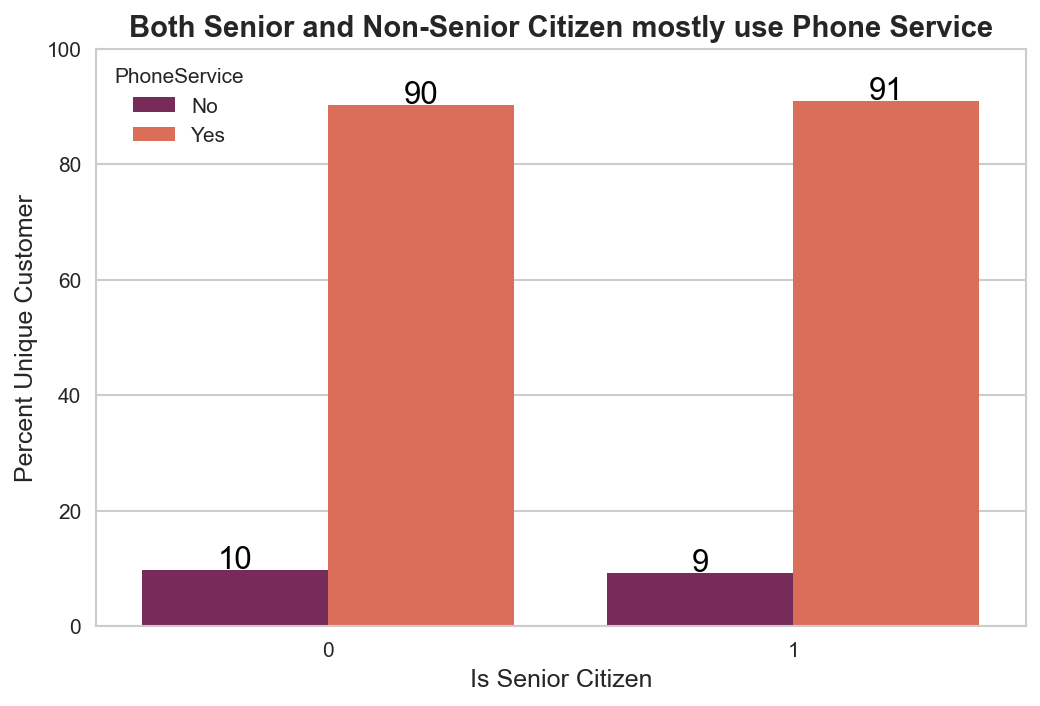

In [40]:
fig = plt.figure(figsize=(8,5),dpi=150)
style.use('seaborn-whitegrid')
plot = sns.barplot(x ='SeniorCitizen', y = 'PercentUniqueCustomer', hue='PhoneService', data=senior_merge_data, ci=None, palette = 'rocket')
plt.title('Both Senior and Non-Senior Citizen mostly use Phone Service', weight='bold', fontsize=14)
plt.xlabel('Is Senior Citizen', fontsize=12)
plt.ylabel('Percent Unique Customer', fontsize=12)
plt.ylim(0,100)
# Annotating Barplot
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black',
                   size=15,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

    
plt.show()


It can be concluded that around 90% of both senior and non-senior citizens use telephone services.

## 4. Total Cost Distribution

"What is the distribution of the total cost?":

* Plot a histogram or density plot to visualize the distribution of 'TotalCharges' or calculate descriptive statistics.

In [41]:
# Converting Total Charges to numerical data type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group         0
dtype: int64

There are 11 missing values in TotalCharges, so they need to be handled first to process the data. Since the number of missing values is small, we will use the dropna() method.

/var/folders/v0/tlwb_9p96z79tgcy17l0j5br0000gn/T/ipykernel_9719/455813856.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalCharges'], color='Red', shade=True)


(0.0, 0.0004)

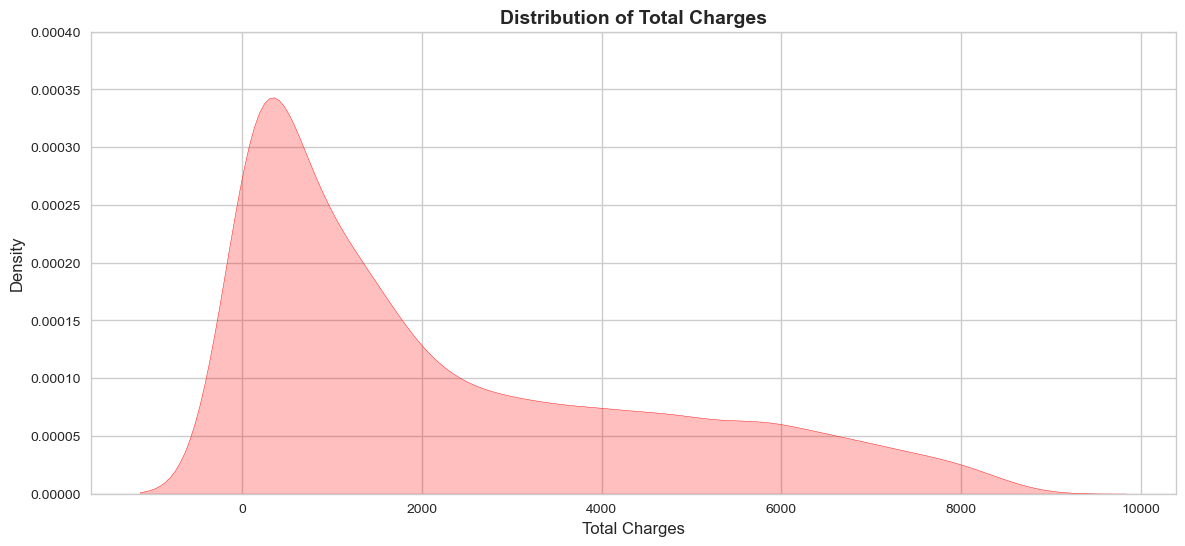

In [84]:
# distribution using sns kde plot
%matplotlib inline
fig = plt.figure(figsize=(14,6))
sns.kdeplot(df['TotalCharges'], color='Red', shade=True)
plt.title('Distribution of Total Charges', weight='bold', fontsize=14)
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.ylim(0, 0.00040)

The majority of the total customer charges are below 2000.

## 5. Monthly Cost and Churn Analysis

"Do customers with higher monthly costs tend to churn more frequently?":

* Group the data into different cost ranges (e.g., low, medium, high) based on 'MonthlyCharges.'
* Calculate the churn rate for each cost range.


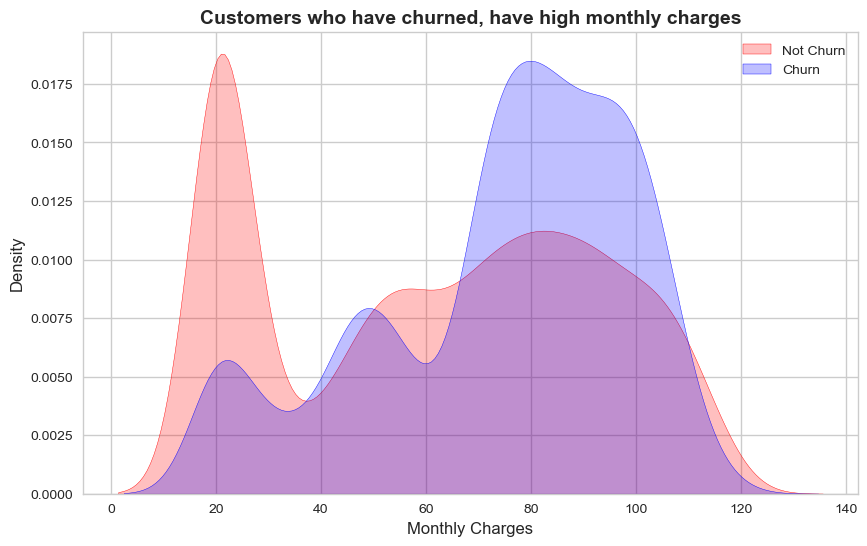

In [45]:
fig = plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'No') ],
                 color='Red', fill=True)
ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'Yes') ],
                 color='Blue', fill=True)

ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_title('Customers who have churned, have high monthly charges', weight='bold', fontsize=14)
ax.set_ylabel('Density', fontsize=12)
ax.set_xlabel('Monthly Charges', fontsize=12);

From the plot above, it can be concluded that customers with high monthly charges (between 70 and 118) are more likely to churn compared to those who have lower monthly charges.

## 6. Partner and Dependents Impact on Churn

"How does the presence of a partner and dependents impact customer churn rates?":

* Group the data by 'Partner' and 'Dependents' status.
* Calculate the churn rate for each group.

In [46]:
#i. Having a partner and dependents
partner1 = df[(df['Partner']=='Yes') & (df['Dependents'] == 'Yes')]
partner1.shape


(1749, 22)

In [47]:
#ii. Having a partner and no dependents
partner2 = df[(df['Partner']=='Yes') & (df['Dependents'] == 'No')]
partner2.shape

(1653, 22)

In [48]:
# Combine as a partner
partner = pd.concat([partner1, partner2], axis=0)
partner.shape   

(3402, 22)

In [49]:
# iii. No partner, but having dependents
dependents1 = df[(df['Partner'] == 'No') & (df['Dependents'] == 'Yes')]
dependents1.shape

(361, 22)

In [50]:
# iv. No partner and no dependents
dependents2 = df[(df['Partner'] == 'No') & (df['Dependents'] == 'No')]
dependents2.shape

(3280, 22)

In [53]:
# Combine as "Dependents"
dependents = pd.concat([dependents1, dependents2], axis=0)
dependents.shape

(3641, 22)

In [54]:
# Combine "Partner and Dependents"
partner_dependents = pd.concat([partner, dependents], axis=0)
partner_dependents.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,low_tenure
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,high_tenure
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,low_tenure
24,6322-HRPFA,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,...,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No,high_tenure
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,high_tenure


In [55]:
# Calculate the churn customer ratio
partner_dependents_gb = partner_dependents.groupby(['Partner', 'Dependents', 'Churn'])['customerID'].nunique().reset_index()
partner_dependents_gb

,Partner,Dependents,Churn,customerID
0,No,No,No,2157
1,No,No,Yes,1123
2,No,Yes,No,284
3,No,Yes,Yes,77
4,Yes,No,No,1233
5,Yes,No,Yes,420
6,Yes,Yes,No,1500
7,Yes,Yes,Yes,249


In [56]:
partner_dependents_gb['partner_dependents'] = partner_dependents_gb['Partner'] + '-' + partner_dependents_gb['Dependents']
partner_dependents_gb

,Partner,Dependents,Churn,customerID,partner_dependents
0,No,No,No,2157,No-No
1,No,No,Yes,1123,No-No
2,No,Yes,No,284,No-Yes
3,No,Yes,Yes,77,No-Yes
4,Yes,No,No,1233,Yes-No
5,Yes,No,Yes,420,Yes-No
6,Yes,Yes,No,1500,Yes-Yes
7,Yes,Yes,Yes,249,Yes-Yes


In [57]:
all_unique = partner_dependents.groupby(['Partner', 'Dependents'])['customerID'].nunique().reset_index()
all_unique = all_unique.rename(columns = {'customerID' : 'AllUniqueCustomer'})
all_unique


,Partner,Dependents,AllUniqueCustomer
0,No,No,3280
1,No,Yes,361
2,Yes,No,1653
3,Yes,Yes,1749


In [58]:
data_group = partner_dependents_gb.merge(all_unique)
data_group

,Partner,Dependents,Churn,customerID,partner_dependents,AllUniqueCustomer
0,No,No,No,2157,No-No,3280
1,No,No,Yes,1123,No-No,3280
2,No,Yes,No,284,No-Yes,361
3,No,Yes,Yes,77,No-Yes,361
4,Yes,No,No,1233,Yes-No,1653
5,Yes,No,Yes,420,Yes-No,1653
6,Yes,Yes,No,1500,Yes-Yes,1749
7,Yes,Yes,Yes,249,Yes-Yes,1749


In [59]:
data_group['percentage'] = (data_group['customerID']/data_group['AllUniqueCustomer']) * 100
data_group.loc[:, 'percentage'] = data_group['percentage'].map('{:.2f}'.format)
data_group

,Partner,Dependents,Churn,customerID,partner_dependents,AllUniqueCustomer,percentage
0,No,No,No,2157,No-No,3280,65.76
1,No,No,Yes,1123,No-No,3280,34.24
2,No,Yes,No,284,No-Yes,361,78.67
3,No,Yes,Yes,77,No-Yes,361,21.33
4,Yes,No,No,1233,Yes-No,1653,74.59
5,Yes,No,Yes,420,Yes-No,1653,25.41
6,Yes,Yes,No,1500,Yes-Yes,1749,85.76
7,Yes,Yes,Yes,249,Yes-Yes,1749,14.24


In [60]:
data = data_group.drop(['Partner', 'Dependents', 'AllUniqueCustomer'], axis=1)
data

,Churn,customerID,partner_dependents,percentage
0,No,2157,No-No,65.76
1,Yes,1123,No-No,34.24
2,No,284,No-Yes,78.67
3,Yes,77,No-Yes,21.33
4,No,1233,Yes-No,74.59
5,Yes,420,Yes-No,25.41
6,No,1500,Yes-Yes,85.76
7,Yes,249,Yes-Yes,14.24


In [62]:
first_column = data.pop('partner_dependents')
data.insert(0, 'partner_dependents', first_column)

third_column = data.pop('percentage')
data.insert(2, 'percentage', third_column)

data

,partner_dependents,Churn,percentage,customerID
0,No-No,No,65.76,2157
1,No-No,Yes,34.24,1123
2,No-Yes,No,78.67,284
3,No-Yes,Yes,21.33,77
4,Yes-No,No,74.59,1233
5,Yes-No,Yes,25.41,420
6,Yes-Yes,No,85.76,1500
7,Yes-Yes,Yes,14.24,249


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   partner_dependents  8 non-null      object
 1   Churn               8 non-null      object
 2   percentage          8 non-null      object
 3   customerID          8 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [64]:
data['percentage'] = data['percentage'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   partner_dependents  8 non-null      object 
 1   Churn               8 non-null      object 
 2   percentage          8 non-null      float64
 3   customerID          8 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 320.0+ bytes


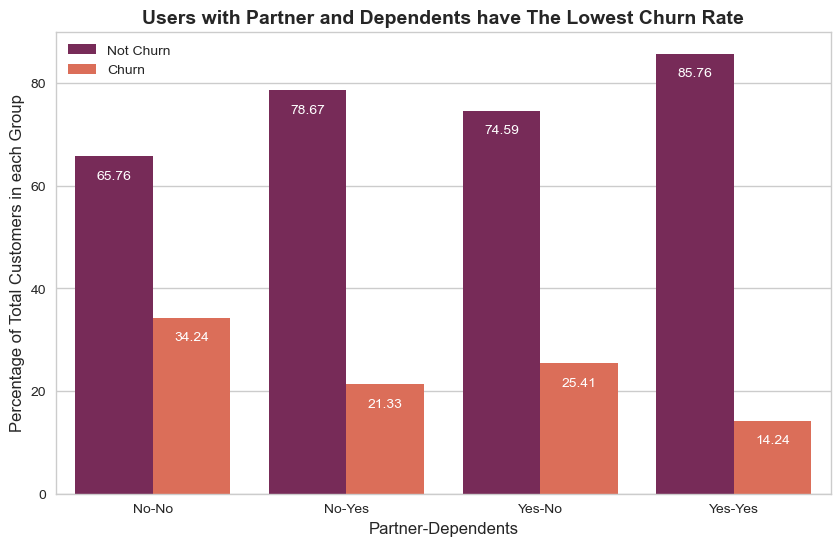

In [70]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x ='partner_dependents', y = 'percentage', hue='Churn', data=data, errorbar=None, palette='rocket')
ax.set_title('Users with Partner and Dependents have The Lowest Churn Rate', weight='bold', fontsize=14)
ax.set_ylabel('Percentage of Total Customers in each Group', fontsize=12)
ax.set_xlabel('Partner-Dependents', fontsize=12)
ax.legend(['Not Churn','Churn'],loc='upper left')
for p in ax.patches:ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.show()


"The Churn Rate is Lowest for Customers with Both Partners and Dependents (Yes-Yes)

## 7. Payment Method and Churn Analysis

"Which payment method exhibits the highest churn rate among customers?":

* Group the data by 'PaymentMethod.'
* Calculate the churn rate for each payment method group.


In [71]:
payment = df.groupby(['PaymentMethod', 'Churn'])['customerID'].nunique().reset_index()
payment

,PaymentMethod,Churn,customerID
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


In [72]:
all_unique = df.groupby('PaymentMethod')['customerID'].nunique().reset_index()
all_unique.columns = ['PaymentMethod', 'AllUniqueCustomer']
all_unique

,PaymentMethod,AllUniqueCustomer
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522
2,Electronic check,2365
3,Mailed check,1612


In [73]:
data_merge = payment.merge(all_unique)
data_merge

,PaymentMethod,Churn,customerID,AllUniqueCustomer
0,Bank transfer (automatic),No,1286,1544
1,Bank transfer (automatic),Yes,258,1544
2,Credit card (automatic),No,1290,1522
3,Credit card (automatic),Yes,232,1522
4,Electronic check,No,1294,2365
5,Electronic check,Yes,1071,2365
6,Mailed check,No,1304,1612
7,Mailed check,Yes,308,1612


In [74]:
data_merge['percentage'] = (data_merge['customerID'] / data_merge['AllUniqueCustomer']) * 100
data_merge.loc[:, 'percentage'] = data_merge['percentage'].map('{:.2f}'.format)
data_merge

,PaymentMethod,Churn,customerID,AllUniqueCustomer,percentage
0,Bank transfer (automatic),No,1286,1544,83.29
1,Bank transfer (automatic),Yes,258,1544,16.71
2,Credit card (automatic),No,1290,1522,84.76
3,Credit card (automatic),Yes,232,1522,15.24
4,Electronic check,No,1294,2365,54.71
5,Electronic check,Yes,1071,2365,45.29
6,Mailed check,No,1304,1612,80.89
7,Mailed check,Yes,308,1612,19.11


In [75]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PaymentMethod      8 non-null      object
 1   Churn              8 non-null      object
 2   customerID         8 non-null      int64 
 3   AllUniqueCustomer  8 non-null      int64 
 4   percentage         8 non-null      object
dtypes: int64(2), object(3)
memory usage: 384.0+ bytes


In [76]:
data_merge['percentage'] = data_merge['percentage'].astype(float)
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PaymentMethod      8 non-null      object 
 1   Churn              8 non-null      object 
 2   customerID         8 non-null      int64  
 3   AllUniqueCustomer  8 non-null      int64  
 4   percentage         8 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 384.0+ bytes


/var/folders/v0/tlwb_9p96z79tgcy17l0j5br0000gn/T/ipykernel_9719/1178114777.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')


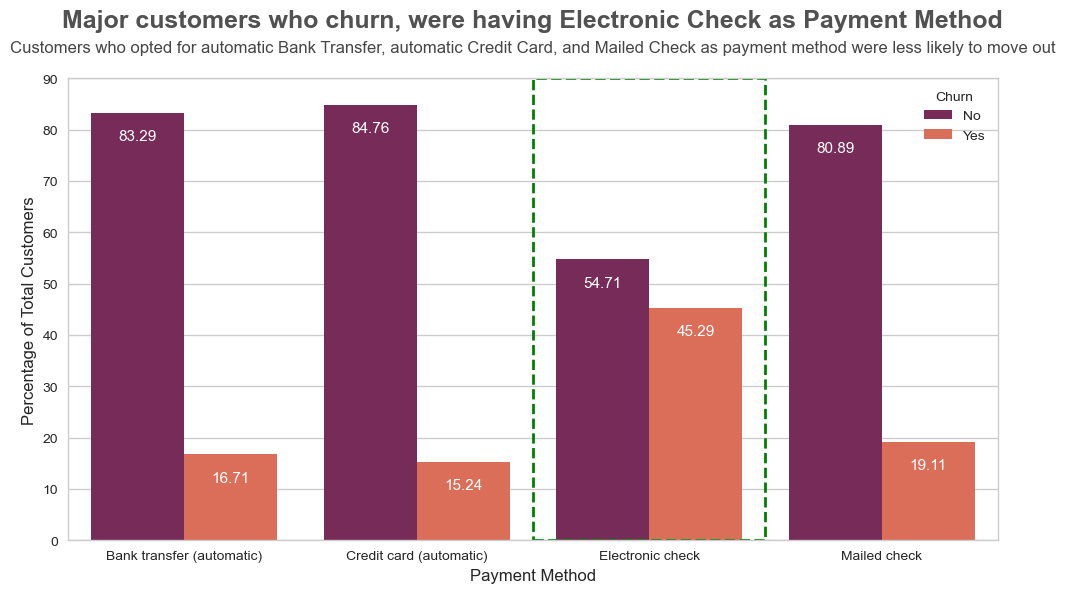

In [83]:
import matplotlib.patches as patches

# Create the figure and axes
fig = plt.figure(figsize=(12, 6))
style.use('seaborn-whitegrid')
data = data_merge
ax = sns.barplot(x='PaymentMethod', y='percentage', hue='Churn', data=data_merge, palette='rocket')
ax.set_ylabel('Percentage of Total Customers', fontsize=12)
ax.set_xlabel('Payment Method', fontsize=12)
plt.ylim(0, 90)

# Annotate the bars
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha='center', va='top', color='white', size=11)

# Give title and subtitle
ax.text(x=0.5, y=1.1, s='Major customers who churn, were having Electronic Check as Payment Method', fontsize=18, weight='bold', ha='center', va='bottom', alpha=0.8, transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Customers who opted for automatic Bank Transfer, automatic Credit Card, and Mailed Check as payment method were less likely to move out', fontsize=12, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)

# Highlight the highest churn and the highest not churn
# Create a square with dashed lines
highlight_square = patches.Rectangle((1.5, 0), 1, 90, linestyle='dashed', edgecolor='green', facecolor='none', lw=2)
ax.add_patch(highlight_square)

# Set grey color to the other bars
#for i in [4, 5, 7, 2]:
#    ax.patches[i].set_fc('grey')

plt.show()


In the graph above, it can be concluded that customers who make payments using Electronic Check have the highest churn rate (orange) compared to other payment methods. Conversely, customers who opt for Bank Transfer, Credit Card, and Mailed Check as their payment methods have a significant tendency not to churn.